In [45]:
import random
random.seed(0)

import cv2
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

import tensorflow as tf
tf.random.set_seed(0)
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from zipfile import ZipFile
dataset='/content/plantvillage-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The file has been extracted!')

The file has been extracted!


In [6]:
base_dir = '/content/plantvillage dataset/color'

In [7]:
# targets

img_size=224
batch_size=32

In [8]:
# data generator

data_generator = ImageDataGenerator(rescale=1./225, validation_split=0.2)

In [9]:
# trian_generator

train_generator = data_generator.flow_from_directory(base_dir,
                                                     target_size=(img_size, img_size),
                                                     class_mode='categorical',
                                                     subset='training',
                                                     batch_size=batch_size)

Found 43456 images belonging to 38 classes.


In [10]:
# validation generator

validation_generator = data_generator.flow_from_directory(base_dir,
                                                     target_size=(img_size, img_size),
                                                     class_mode='categorical',
                                                     subset='validation',
                                                     batch_size=batch_size)

Found 10849 images belonging to 38 classes.


### **Building CNN**

In [11]:
model = keras.Sequential([keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(img_size, img_size,3)),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          keras.layers.Flatten(),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(train_generator.num_classes, activation='softmax')


                          ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,254,438 (84.89 MB)

 Trainable params: 22,254,438 (84.89 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
train_generator.samples

43456

In [15]:
batch_size

32

In [30]:
history = model.fit(train_generator, validation_data = validation_generator, epochs=5)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 70ms/step - accuracy: 0.9916 - loss: 0.0266 - val_accuracy: 0.8942 - val_loss: 0.6434
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 97s 71ms/step - accuracy: 0.9882 - loss: 0.0403 - val_accuracy: 0.9068 - val_loss: 0.6312
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 99s 73ms/step - accuracy: 0.9915 - loss: 0.0314 - val_accuracy: 0.8931 - val_loss: 0.7332
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 153s 80ms/step - accuracy: 0.9915 - loss: 0.0299 - val_accuracy: 0.9199 - val_loss: 0.5394
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 147s 108ms/step - accuracy: 0.9906 - loss: 0.0360 - val_accuracy: 0.9144 - val_loss: 0.5549


In [31]:
model.evaluate(validation_generator, steps = validation_generator.samples // batch_size)

339/339 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9167 - loss: 0.5206


[0.5547482371330261, 0.9144542813301086]

In [61]:
img_path = input('what is the path of the image?')
img_path

what is the path of the image?/content/apple black rot .JPG


'/content/apple black rot .JPG'

array([[[141, 138, 154],
        [143, 140, 156],
        [139, 136, 152],
        ...,
        [161, 158, 173],
        [153, 150, 165],
        [155, 152, 167]],

       [[139, 136, 152],
        [145, 142, 158],
        [144, 141, 157],
        ...,
        [143, 140, 155],
        [143, 140, 155],
        [155, 152, 167]],

       [[134, 131, 147],
        [146, 143, 159],
        [146, 143, 159],
        ...,
        [136, 133, 148],
        [138, 135, 150],
        [152, 149, 164]],

       ...,

       [[ 73,  71,  83],
        [149, 147, 159],
        [175, 173, 185],
        ...,
        [147, 140, 153],
        [167, 160, 173],
        [165, 158, 171]],

       [[152, 152, 164],
        [174, 174, 186],
        [162, 162, 174],
        ...,
        [153, 146, 159],
        [151, 144, 157],
        [149, 142, 155]],

       [[135, 137, 148],
        [141, 143, 154],
        [131, 131, 143],
        ...,
        [187, 180, 193],
        [172, 165, 178],
        [158, 151, 164]]], dtype=uint8)
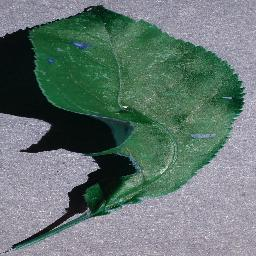

In [63]:
img = cv2.imread(img_path)
img

In [64]:
img = cv2.resize(img, (224,224))
img_array = np.array(img)
img = np.reshape(img_array, [1,224,224,3])
img = img.astype('float32')/255

prediction = model.predict(img)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[3.6091625e-19 1.0000000e+00 8.1740194e-28 5.3694303e-14 1.2717557e-15
  8.0748790e-20 1.2682012e-13 6.7083864e-30 1.0969344e-27 2.8336020e-32
  1.0032631e-30 8.3338706e-28 5.2952858e-22 5.0081119e-34 1.1711959e-27
  1.8397765e-26 9.5388669e-23 2.6914820e-25 2.0635857e-23 8.2123986e-21
  1.9754191e-26 3.8157136e-28 9.9747232e-27 1.1112118e-27 1.1448245e-20
  2.9455611e-30 1.8508364e-32 8.3088633e-19 7.1941547e-33 1.8261797e-15
  4.2096733e-16 6.9507309e-22 1.9900600e-13 4.7930401e-31 8.3397034e-25
  6.9655953e-22 9.2038491e-26 3.6951249e-30]]


In [65]:
prediction_labels = np.argmax(prediction, axis=1)[0]
print(prediction_labels)

1


In [66]:
class_indices = {v: k for k,v in train_generator.class_indices.items()}

In [67]:
indices = class_indices[prediction_labels]

print(indices)

Apple___Black_rot
